In [3]:
import os
import shutil
import random
from tqdm import tqdm

# Set your paths
original_dataset_dir = r'C:\Users\sifat\Desktop\dish dataset\Fish Data'  # Root folder with class subfolders
base_dir = r'C:\Users\sifat\Desktop\dish dataset\Fish Data Split'        # Output folder for split dataset

# Set split ratios
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Create output folders
splits = ['train', 'val', 'test']
for split in splits:
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)

# Process each class
for class_name in tqdm(os.listdir(original_dataset_dir), desc="Splitting dataset"):
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Recursively collect all image files from subfolders
    images = []
    for root, _, files in os.walk(class_path):
        for file in files:
            if not file.startswith('.') and file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                images.append(os.path.join(root, file))

    random.shuffle(images)

    total = len(images)
    train_end = int(train_split * total)
    val_end = train_end + int(val_split * total)

    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    # Copy images to respective folders
    for img_path in train_imgs:
        dst_path = os.path.join(base_dir, 'train', class_name, os.path.basename(img_path))
        shutil.copy(img_path, dst_path)

    for img_path in val_imgs:
        dst_path = os.path.join(base_dir, 'val', class_name, os.path.basename(img_path))
        shutil.copy(img_path, dst_path)

    for img_path in test_imgs:
        dst_path = os.path.join(base_dir, 'test', class_name, os.path.basename(img_path))
        shutil.copy(img_path, dst_path)

print("✅ Dataset splitting complete!")


Splitting dataset: 100%|██████████| 20/20 [09:46<00:00, 29.35s/it]

✅ Dataset splitting complete!


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Image settings
img_height, img_width = 128, 128  # Resize all images

# Data generators
datagen = ImageDataGenerator(rescale=1./255)

train_ds = datagen.flow_from_directory(r'C:\Users\sifat\Desktop\dish dataset\Fish Data Split\train', target_size=(img_height, img_width), batch_size=32, class_mode='categorical')
val_ds = datagen.flow_from_directory(r'C:\Users\sifat\Desktop\dish dataset\Fish Data Split\val', target_size=(img_height, img_width), batch_size=32, class_mode='categorical')
test_ds = datagen.flow_from_directory(r'C:\Users\sifat\Desktop\dish dataset\Fish Data Split\test', target_size=(img_height, img_width), batch_size=32, class_mode='categorical')

# ANN model
ann_model = models.Sequential([
    layers.Flatten(input_shape=(img_height, img_width, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_ds.num_classes, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ANN
ann_model.fit(train_ds, validation_data=val_ds, epochs=10)

# Evaluate
ann_model.evaluate(test_ds)


Found 35000 images belonging to 20 classes.
Found 7500 images belonging to 20 classes.
Found 7500 images belonging to 20 classes.


c:\Users\sifat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\sifat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 821s 749ms/step - accuracy: 0.1313 - loss: 7.8590 - val_accuracy: 0.2028 - val_loss: 2.4688
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 405s 370ms/step - accuracy: 0.2660 - loss: 2.2828 - val_accuracy: 0.3056 - val_loss: 2.1243
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 399s 364ms/step - accuracy: 0.3333 - loss: 2.0758 - val_accuracy: 0.3812 - val_loss: 1.9427
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 425s 389ms/step - accuracy: 0.3849 - loss: 1.9244 - val_accuracy: 0.3501 - val_loss: 2.0485
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 419s 383ms/step - accuracy: 0.4060 - loss: 1.8645 - val_accuracy: 0.3633 - val_loss: 2.0242
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 390s 357ms/step - accuracy: 0.4329 - loss: 1.7807 - val_accuracy: 0.4127 - val_loss: 1.8177
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 381s 348ms/step - accuracy: 0.4503 - loss: 1.7087 - val_accuracy: 0.4017 - val_loss: 1.8846
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 385s 352ms/step - ac

[1.6136043071746826, 0.49373334646224976]

In [6]:
# Evaluate ANN on test set
loss, accuracy = ann_model.evaluate(test_ds)
print(f"Test Accuracy of ANN: {accuracy * 100:.2f}%")


235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.4855 - loss: 1.6434
Test Accuracy of ANN: 49.37%


In [7]:
# CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_ds.num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(train_ds, validation_data=val_ds, epochs=10)

# Evaluate
cnn_model.evaluate(test_ds)


c:\Users\sifat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 362s 329ms/step - accuracy: 0.4211 - loss: 1.8747 - val_accuracy: 0.8084 - val_loss: 0.5940
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 350s 320ms/step - accuracy: 0.8583 - loss: 0.4412 - val_accuracy: 0.8945 - val_loss: 0.3393
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 351s 321ms/step - accuracy: 0.9368 - loss: 0.1996 - val_accuracy: 0.8875 - val_loss: 0.3825
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 346s 316ms/step - accuracy: 0.9633 - loss: 0.1136 - val_accuracy: 0.8565 - val_loss: 0.5341
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 350s 320ms/step - accuracy: 0.9666 - loss: 0.1024 - val_accuracy: 0.9013 - val_loss: 0.3686
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 354s 323ms/step - accuracy: 0.9768 - loss: 0.0690 - val_accuracy: 0.8973 - val_loss: 0.4475
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 354s 323ms/step - accuracy: 0.9752 - loss: 0.0727 - val_accuracy: 0.8956 - val_loss: 0.4695
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 387s 354ms/step - ac

[0.4918077886104584, 0.9007999897003174]

In [9]:
# Evaluate CNN on test set
loss, accuracy = cnn_model.evaluate(test_ds)
print(f"Test Accuracy of CNN: {accuracy * 100:.2f}%")


235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 139ms/step - accuracy: 0.8997 - loss: 0.5017
Test Accuracy of CNN: 90.08%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


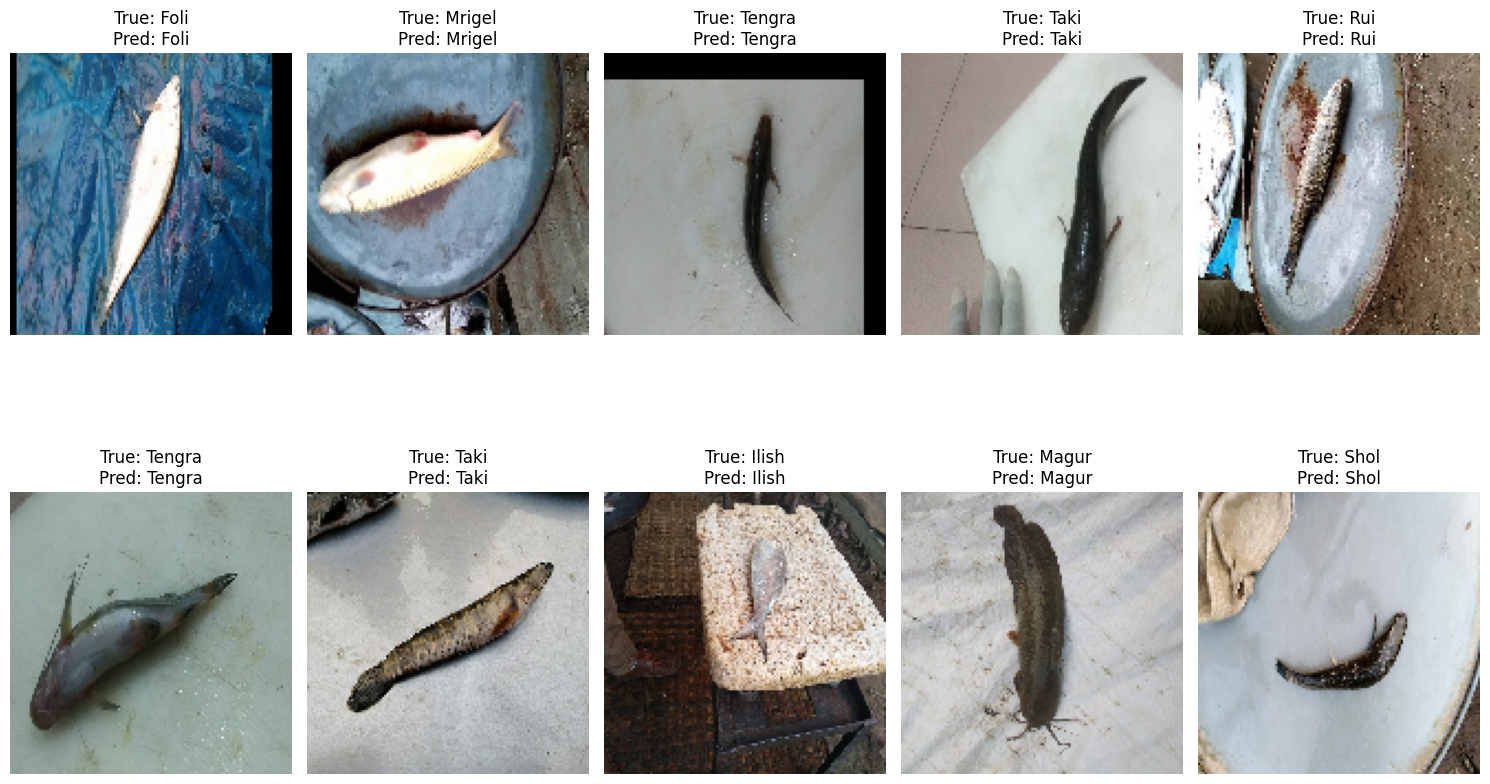

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Path to your test directory
test_dir = r'C:\Users\sifat\Desktop\dish dataset\Fish Data Split\test'

# Get class indices to map prediction to label
class_indices = test_ds.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Get all test image file paths with their labels
all_test_images = []
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                all_test_images.append((os.path.join(class_path, img_file), class_name))

# Randomly sample 10 images from test set
sample_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 10))
for i, (img_path, true_label) in enumerate(sample_images):
    # Load image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0  # rescale
    img_array_expanded = np.expand_dims(img_array, axis=0)  # batch dimension

    # Predict
    predictions = cnn_model.predict(img_array_expanded)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    predicted_label = idx_to_class[predicted_class_idx]

    # Plot
    plt.subplot(2, 5, i+1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()
